In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df=pd.read_csv('Dataset.csv')

In [40]:
df.head()

,1949-01-01,112
0,1949-02-01,118
1,1949-03-01,132
2,1949-04-01,129
3,1949-05-01,121
4,1949-06-01,135


In [41]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1949-02-01,118
1,1949-03-01,132
2,1949-04-01,129
3,1949-05-01,121
4,1949-06-01,135


In [42]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [43]:
df.head()

,Month,Sales
0,1949-02-01,118
1,1949-03-01,132
2,1949-04-01,129
3,1949-05-01,121
4,1949-06-01,135


In [44]:
df.set_index('Month',inplace=True)

In [45]:
df.head()

,Sales
Month,
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135


In [46]:
df.describe()

,Sales
count,143.000000
mean,281.475524
std,119.550851
min,104.000000
25%,180.500000
50%,267.000000
75%,361.000000
max,622.000000


<AxesSubplot:xlabel='Month'>

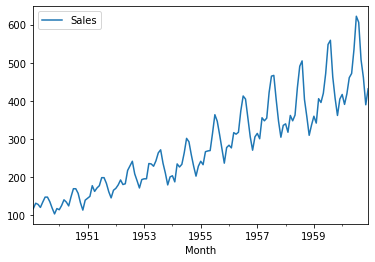

In [47]:
df.plot()

In [48]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [49]:
test_result=adfuller(df['Sales'])

In [50]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )


In [51]:
adfuller_test(df['Sales'])

ADF Test Statistic : 0.7923399959692567
p-value : 0.991511509628866
#Lags Used : 13
Number of Observations Used : 129


## Differencing

In [52]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [53]:
df['Sales'].shift(1)

Month
1949-02-01      NaN
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
1949-06-01    121.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: Sales, Length: 143, dtype: float64

In [54]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [55]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1949-02-01,118,NaN,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
1949-06-01,135,14.0,NaN
1949-07-01,148,13.0,NaN
1949-08-01,148,0.0,NaN
1949-09-01,136,-12.0,NaN
1949-10-01,119,-17.0,NaN


In [56]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.375189099719882
p-value : 0.01183431811588939
#Lags Used : 1
Number of Observations Used : 129


<AxesSubplot:xlabel='Month'>

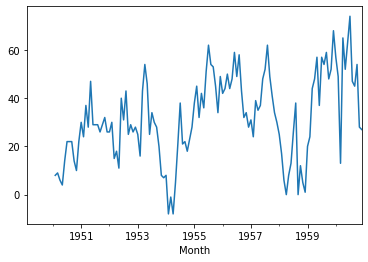

In [57]:
df['Seasonal First Difference'].plot()

In [58]:
pip install pandas.tools

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pandas.tools (from versions: none)
ERROR: No matching distribution found for pandas.tools


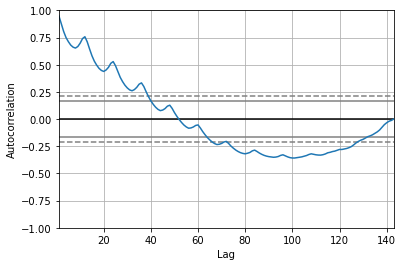

In [59]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [60]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

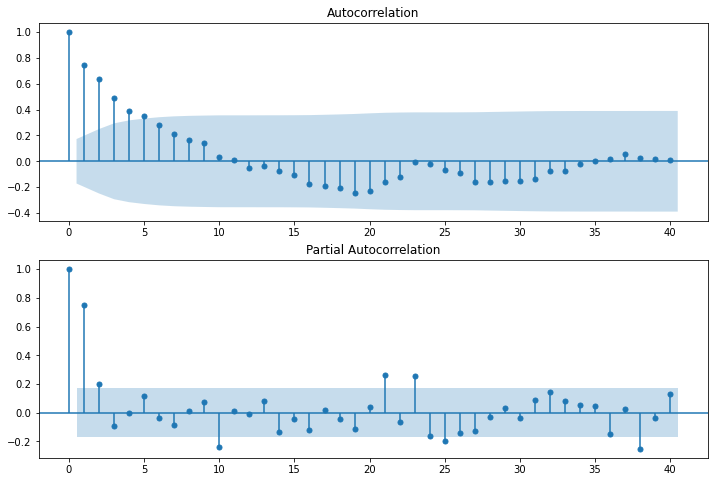

In [61]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [62]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [63]:
series = df['Sales'].squeeze()

In [66]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

arima_model=sm.tsa.arima.ARIMA(df.Sales,order=(1,1,2))
model=arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -684.423
Date:                Tue, 19 Jul 2022   AIC                           1376.846
Time:                        23:42:40   BIC                           1388.669
Sample:                    02-01-1949   HQIC                          1381.650
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5722      0.097      5.888      0.000       0.382       0.763
ma.L1         -0.3127      0.098     -3.179      0.001      -0.506      -0.120
ma.L2         -0.5078      0.069     -7.359      0.0

C:\Users\vikas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\vikas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\vikas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


C:\Users\vikas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

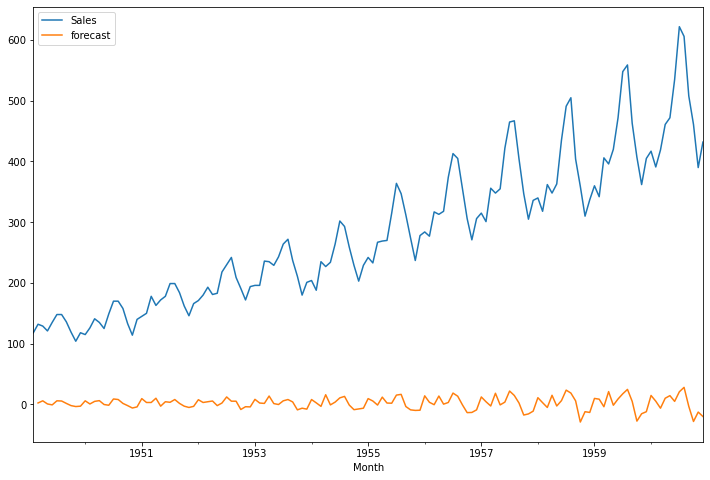

In [67]:
df['forecast']=model_fit.predict()
df[['Sales','forecast']].plot(figsize=(12,8))

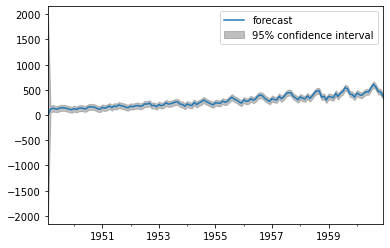

In [68]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(model,dynamic=False)
plt.show()

In [69]:
train = df.loc['1949-01':'1956-12']
test = df.loc['1957-01':'1960-12']

In [77]:
y = train['Sales']